## Name: Nhat Tran (1000787456)
### Date: Nov 15
### Assignment 05

In [2]:
import os
import numpy as np
from scipy import misc

def cifar_data(size='1000', dataset='train', dir_path='.'):
    path = ''
    if size == '1000':
        path = dir_path + '/cifar_data_1000_100/'
        if dataset == 'train':
            path = path + 'train/'
        elif dataset == 'test':
            path = path + 'test/'
    elif size == '100':
        path = dir_path + '/cifar_data_100_10/'
        if dataset == 'train':
            path = path + 'train/'
        elif dataset == 'test':
            path = path + 'test/'

    files_list = os.listdir(path)
    n_samples = len(files_list)
    X = np.ndarray((n_samples, 3072))
    y = np.ndarray((n_samples, 10))

    for i in range(n_samples):
        class_label = files_list[i].split('_')[0]
        img_arr = np.asarray(misc.imread(path + files_list[i])).ravel()
        X[i] = img_arr

        y[i] = np.eye(10)[int(class_label)]

    return X, y

## Task 1

(1000, 3072) (1000, 10)


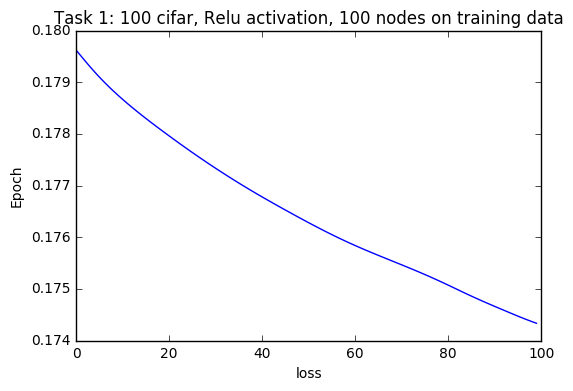

In [4]:
from Projects.Kamangar_NeuralNet.Tran_assignment_05.neural_net import NeuralNet
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt

tr_X, tr_y = cifar_data(size='100', dataset='train', dir_path='.')
te_X, te_y = cifar_data(size='100', dataset='test', dir_path='.')
tr_X = preprocessing.scale(tr_X)
print tr_X.shape, tr_y.shape

nnet = NeuralNet(n_inputs=3072, n_classes=10, n_hidden_nodes=100, alpha=0., n_epoch=200, activation='relu')
nnet.train(tr_X, tr_y, batch_size=tr_X.shape[0])

metrics.confusion_matrix(te_y, nnet.predict(tr))

plt.title('Task 1: 100 cifar, Relu activation, 100 nodes on training data')
plt.xlabel('loss')
plt.ylabel('Epoch')
plt.plot(nnet.losses_)
plt.show()